## Ionospheric Radar Classification Using Linear SVM and Random Forest

### Import Library

In [6]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

### Import Dataset

In [7]:
df = pd.read_csv("Ionosphere_Data.csv")
df

,Target,Data 1,Data 2,Data 3,Data 4,Data 5,Data 6,Data 7,Data 8,Data 9,...,Data 25,Data 26,Data 27,Data 28,Data 29,Data 30,Data 31,Data 32,Data 33,Data 34
0,1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,0,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


### Check Data

In [8]:
df.head()

,Target,Data 1,Data 2,Data 3,Data 4,Data 5,Data 6,Data 7,Data 8,Data 9,...,Data 25,Data 26,Data 27,Data 28,Data 29,Data 30,Data 31,Data 32,Data 33,Data 34
0,1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,0,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,0,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


### Check for null data and drop null data if present

In [9]:
df.isna().sum()

Target     0
Data 1     0
Data 2     0
Data 3     0
Data 4     0
Data 5     0
Data 6     0
Data 7     0
Data 8     0
Data 9     0
Data 10    0
Data 11    0
Data 12    0
Data 13    0
Data 14    0
Data 15    0
Data 16    0
Data 17    0
Data 18    0
Data 19    0
Data 20    0
Data 21    0
Data 22    0
Data 23    0
Data 24    0
Data 25    0
Data 26    0
Data 27    0
Data 28    0
Data 29    0
Data 30    0
Data 31    0
Data 32    0
Data 33    0
Data 34    0
dtype: int64

### Drop columns that are not used

In [10]:
df.drop(['Data 1', 'Data 2'], axis=1, inplace=True)

df.head()

,Target,Data 3,Data 4,Data 5,Data 6,Data 7,Data 8,Data 9,Data 10,Data 11,...,Data 25,Data 26,Data 27,Data 28,Data 29,Data 30,Data 31,Data 32,Data 33,Data 34
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


### Check correlation using Heatmap

<function matplotlib.pyplot.show(close=None, block=None)>

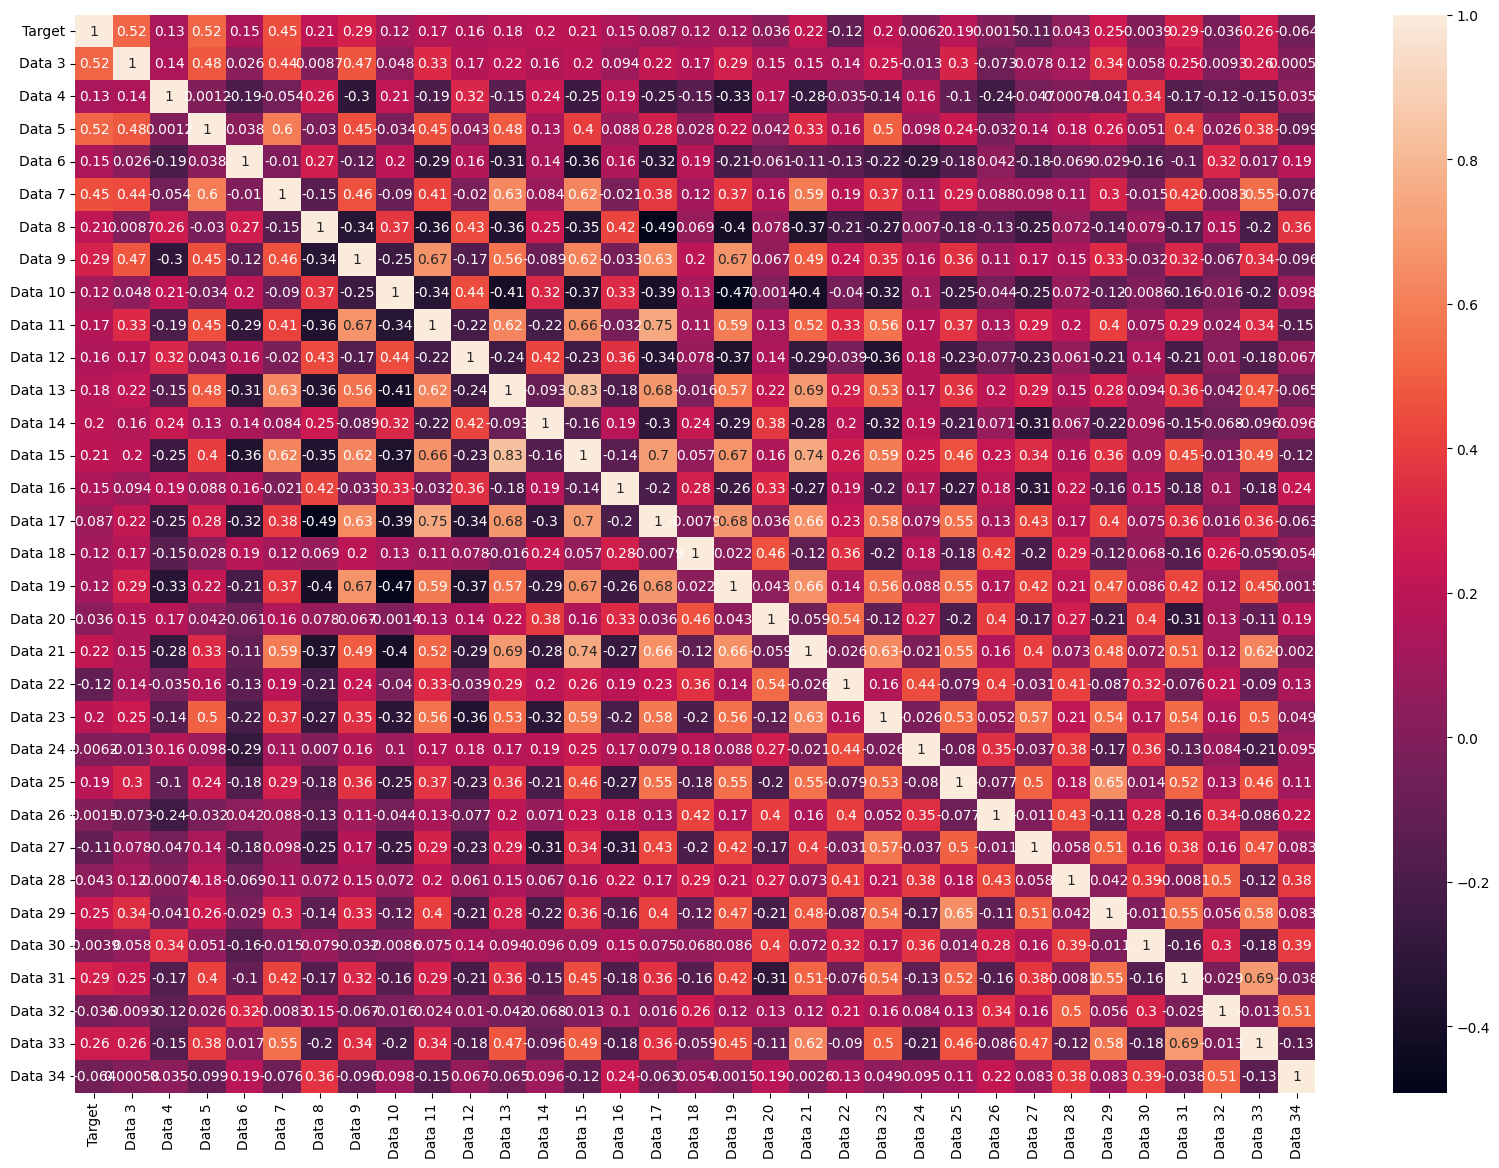

In [11]:
plt.figure(figsize=(20,14))

sns.heatmap(df.corr(), annot=True)
plt.show

### Split test and training data using train-test split with stratification

In [13]:
x = df.drop(['Target'], axis=1)
y = df['Target']

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=30)

for train_i, test_i in sss.split(x,y):
    X_train, X_test = x.loc[train_i], x.loc[test_i]
    y_train, y_test = y.loc[train_i], y.loc[test_i]

y_train

39     0
73     0
258    1
239    1
94     1
      ..
215    1
329    1
267    1
157    1
166    0
Name: Target, Length: 263, dtype: int64

### Fit the model with training data using SVM

In [14]:
model = LinearSVC()
model = model.fit(X_train, y_train)

### Predict test values

In [15]:
prediction_result = model.predict(X_test)
prediction_result

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0])

### Make Classification Report

In [16]:
print("Classification Report")
print(classification_report(y_test, prediction_result))
print('='*50)

Classification Report
              precision    recall  f1-score   support

           0       0.73      0.59      0.66        32
           1       0.79      0.88      0.83        56

    accuracy                           0.77        88
   macro avg       0.76      0.73      0.74        88
weighted avg       0.77      0.77      0.77        88



### Oversampling using SMOTE

In [18]:
SMOTE_oversampling = SMOTE(random_state=30)
X_train_sampling, y_train_sampling = SMOTE_oversampling.fit_resample(X_train,y_train)

### Make new predictions using the Random Forest model

In [19]:
model_rdf = RandomForestClassifier(random_state=30, criterion='entropy')
model_resampled = model_rdf.fit(X_train_sampling, y_train_sampling)
prediction_result_resampled = model_resampled.predict(X_test)
prediction_result_resampled

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

### Make Classification Report

In [20]:
print("Random Forest classification results after oversampling")
print(classification_report(y_test, prediction_result_resampled))
print('='*50)

Random Forest classification results after oversampling
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        32
           1       0.95      0.95      0.95        56

    accuracy                           0.93        88
   macro avg       0.93      0.93      0.93        88
weighted avg       0.93      0.93      0.93        88

